In [1]:
import os
os.chdir("E://python")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
melor = pd.read_csv("Melbourne_housing_FULL.csv")

In [3]:
melor.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
melor.shape

(34857, 21)

In [5]:
melor.isna().sum()/melor['Price'].count()

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.279297
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000037
Postcode         0.000037
Bedroom2         0.301574
Bathroom         0.301905
Car              0.320329
Landsize         0.433442
BuildingArea     0.774948
YearBuilt        0.708555
CouncilArea      0.000110
Lattitude        0.292729
Longtitude       0.292729
Regionname       0.000110
Propertycount    0.000110
dtype: float64

In [6]:
melin = melor.copy()
#'Suburb','Address','Type','Method','SellerG','Date','CouncilArea','Regionname'
melin['Date'] = pd.to_datetime(melin['Date'])

In [7]:
melin.drop(columns=['Suburb','Address','CouncilArea','Method','Bedroom2','Lattitude','Longtitude','Landsize','Propertycount','Date','Type','SellerG','Regionname'],inplace=True)
melin.isna().sum()/melin['Price'].count()

Rooms           0.000000
Price           0.279297
Distance        0.000037
Postcode        0.000037
Bathroom        0.301905
Car             0.320329
BuildingArea    0.774948
YearBuilt       0.708555
dtype: float64

In [8]:
melin.columns
melin.dropna(how='any', subset=['Price','Distance','Postcode','Bathroom','Car','YearBuilt'],inplace = True)
melin.isna().sum()/melin['Price'].count()

Rooms           0.00000
Price           0.00000
Distance        0.00000
Postcode        0.00000
Bathroom        0.00000
Car             0.00000
BuildingArea    0.15217
YearBuilt       0.00000
dtype: float64

In [9]:
melin.dropna(how='any', subset=['BuildingArea'],inplace = True)

In [10]:
#obj_cats = ['Type', 'SellerG','Regionname']
#for colname in obj_cats:
 #   melin[colname] = melin[colname].astype('category')

In [11]:
melin['Age'] = 2020 - melin['YearBuilt']

In [12]:
#from sklearn.impute import SimpleImputer

In [13]:
#my_imputer = SimpleImputer()

In [14]:
#cat_cols = [cname for cname in melin.columns if melin[cname].dtype == 'object']
#num_cols = [cname for cname in melin.columns if melin[cname].dtype in ['int64','float64']]
#s= (melin.dtypes == 'object')
#object_cols = list(s[s].index)
#print(object_cols)
#from sklearn.preprocessing import LabelEncoder
#label = LabelEncoder()

In [15]:
#melin_im = pd.DataFrame(my_imputer.fit_transform(melin))

In [16]:
#melin_im.columns = melin.columns
#melin_im.isna().sum()

In [17]:
from scipy.stats import anderson, shapiro, kstest

In [18]:
# normality test
result = anderson(melin['Price'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 435.247
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [19]:
# normality test - 
stat, p = shapiro(melin['Price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.805, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\santhosh\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [20]:
kstest(melin['Price'],'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [21]:
melin['Price'].skew()

2.4493935735162933

(array([6.005e+03, 3.100e+03, 6.860e+02, 2.020e+02, 5.400e+01, 1.300e+01,
        1.200e+01, 4.000e+00, 2.000e+00, 1.000e+00]),
 array([ 131000., 1017900., 1904800., 2791700., 3678600., 4565500.,
        5452400., 6339300., 7226200., 8113100., 9000000.]),
 <a list of 10 Patch objects>)

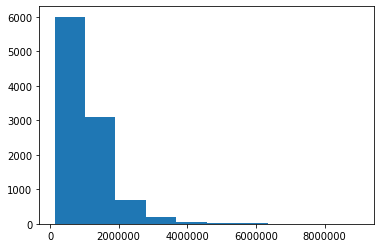

In [22]:
plt.hist(melin['Price'])

In [23]:
melin['ln_price'] = np.log(melin['Price'])
melin.head(5)

,Rooms,Price,Distance,Postcode,Bathroom,Car,BuildingArea,YearBuilt,Age,ln_price
2,2,1035000.0,2.5,3067.0,1.0,0.0,79.0,1900.0,120.0,13.849912
4,3,1465000.0,2.5,3067.0,2.0,0.0,150.0,1900.0,120.0,14.197366
6,4,1600000.0,2.5,3067.0,1.0,2.0,142.0,2014.0,6.0,14.285514
11,3,1876000.0,2.5,3067.0,2.0,0.0,210.0,1910.0,110.0,14.444652
14,2,1636000.0,2.5,3067.0,1.0,2.0,107.0,1890.0,130.0,14.307765


(array([   4.,   89.,  736., 2509., 3004., 2249., 1075.,  347.,   56.,
          10.]),
 array([11.7829526 , 12.20593086, 12.62890911, 13.05188736, 13.47486562,
        13.89784387, 14.32082212, 14.74380038, 15.16677863, 15.58975688,
        16.01273514]),
 <a list of 10 Patch objects>)

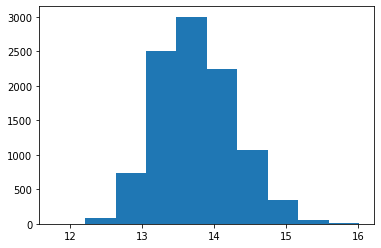

In [24]:
plt.hist(melin['ln_price'])

In [25]:
melin['ln_price'].skew()

0.33472255906922005

In [26]:
# normality test
result = anderson(melin['ln_price'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 22.204
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [27]:
# normality test - 
stat, p = shapiro(melin['ln_price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.993, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\santhosh\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [28]:
melin.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car',
       'BuildingArea', 'YearBuilt', 'Age', 'ln_price'],
      dtype='object')

In [29]:
X = melin[['Rooms','Distance','Postcode','Bathroom','Car','BuildingArea','Age']]
y = melin['ln_price']

In [30]:
from sklearn.model_selection import train_test_split
print(X.shape)
print(y.shape)

(10079, 7)
(10079,)


In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [32]:
print(X_train.shape)
print(X_test.shape)

(8063, 7)
(2016, 7)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [34]:
linear = LinearRegression()

In [35]:
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
y_pred = linear.predict(X_test)
metrics.r2_score(y_test,y_pred)

0.6373220211455162

In [37]:
print('Mean ABSOLUTE ERROR  =  ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean SQUARED ERROR   =  ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean SQUARED ERROR   =  ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean ABSOLUTE ERROR  =   0.2572210659236038
Mean SQUARED ERROR   =   0.10649796988587219
Root Mean SQUARED ERROR   =   0.326340267031012


In [38]:
from sklearn.feature_selection import VarianceThreshold
varModel=VarianceThreshold(threshold=0)
varModel.fit(X_train)

constArr=varModel.get_support()
constArr

array([ True,  True,  True,  True,  True,  True,  True])

In [39]:
import collections
collections.Counter(constArr)

Counter({True: 7})

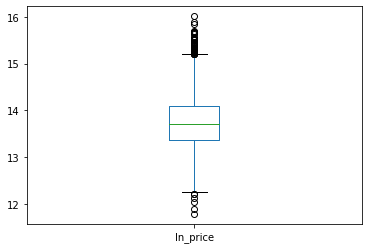

In [40]:
melin['ln_price'].plot(kind='box')

In [41]:
def outlier(x):
    high=0
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3-q1
    low = q1-1.5*iqr
    high += q3+1.5*iqr
    outlier = (x.loc[(x < low) | (x > high)])
    return(outlier)

In [42]:
outlier(melin['ln_price']).count()

58

In [43]:
q1 =melin['ln_price'].quantile(.25)
q3 = melin['ln_price'].quantile(.75)
iqr = q3-q1

In [44]:
melin_new = melin[~((melin['ln_price'] < (q1 - 1.5 *iqr))  |  (melin['ln_price'] > (q3+ 1.5 * iqr)))]

In [45]:
from scipy import stats
train_target, fitted_lambda = stats.boxcox(melin_new['ln_price'])

In [46]:
fitted_lambda

-1.5793291479342886

In [47]:
melin_new['box_price'] = train_target

C:\Users\santhosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
melin_new.head(5)

,Rooms,Price,Distance,Postcode,Bathroom,Car,BuildingArea,YearBuilt,Age,ln_price,box_price
2,2,1035000.0,2.5,3067.0,1.0,0.0,79.0,1900.0,120.0,13.849912,0.623208
4,3,1465000.0,2.5,3067.0,2.0,0.0,150.0,1900.0,120.0,14.197366,0.623590
6,4,1600000.0,2.5,3067.0,1.0,2.0,142.0,2014.0,6.0,14.285514,0.623684
11,3,1876000.0,2.5,3067.0,2.0,0.0,210.0,1910.0,110.0,14.444652,0.623848
14,2,1636000.0,2.5,3067.0,1.0,2.0,107.0,1890.0,130.0,14.307765,0.623707


In [49]:
X1 = melin_new[['Rooms','Distance','Postcode','Bathroom','Car','BuildingArea','Age']]
y1 = melin_new['box_price']

In [50]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=1)

In [51]:
linear1 = LinearRegression()

In [52]:
linear1.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
y1_pred = linear1.predict(X1_test)
print(metrics.r2_score(y1_test,y1_pred))
print(metrics.explained_variance_score(y1_test,y1_pred))

0.6249970633862085
0.6253393335742657


In [54]:
import statsmodels.api as sm

In [55]:
model_sum = sm.OLS(y_train,X_train).fit()
model_sum1 = sm.OLS(y1_train,X1_train).fit()

In [56]:
model_sum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               ln_price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          9.700e+05
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        16:10:34   Log-Likelihood:                         -5413.0
No. Observations:                8063   AIC:                                  1.084e+04
Df Residuals:                    8056   BIC:                                  1.089e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Rooms            0.2897      0.008     34.912      0.000       0.273       0.306
Distance        -0.0613      0.001    -70.304      0.000      -0.063      -0.060
Postcode         0.0041   7.18e-06    577.748      0.000       0.004       0.004
Bathroom         0.0624      0.010      6.041      0.000       0.042       0.083
Car              0.0819      0.006     13.403      0.000       0.070       0.094
BuildingArea     0.0011    7.9e-05     13.890      0.000       0.001       0.001
Age              0.0040      0.000     25.021      0.000       0.004       0.004
==============================================================================
Omnibus:                     4089.704   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40733.233
Skew:                          -2.217   Prob(JB):                         0.00
Kurtosis:                      13.079   Cond. No.                     6.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
#StandardScaler to standardize the dataset

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
melin_Scaled = melin[['Rooms','Distance','Postcode','Bathroom','Car','BuildingArea','Age']]
melin_Scaled.head(3)

,Rooms,Distance,Postcode,Bathroom,Car,BuildingArea,Age
2,2,2.5,3067.0,1.0,0.0,79.0,120.0
4,3,2.5,3067.0,2.0,0.0,150.0,120.0
6,4,2.5,3067.0,1.0,2.0,142.0,6.0


In [60]:
scaler = StandardScaler()
scaler.fit(melin_Scaled)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [61]:
melin_scaled = scaler.transform(melin_Scaled)
melin_scaled
melin_scaled = pd.DataFrame(melin_scaled,columns=melin_Scaled.columns)
melin_scaled.head(3)

,Rooms,Distance,Postcode,Bathroom,Car,BuildingArea,Age
0,-1.155454,-1.278655,-0.398375,-0.916620,-1.761290,-0.813558,1.824657
1,-0.115463,-1.278655,-0.398375,0.476836,-1.761290,-0.003707,1.824657
2,0.924528,-1.278655,-0.398375,-0.916620,0.302901,-0.094958,-1.272956


In [62]:
X2 = melin_scaled
print(X2.shape)
y2 = melin['ln_price']
print(y2.shape)

(10079, 7)
(10079,)


In [63]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state=1)
print(X2_train.shape)
print(y2_train.shape)

(8063, 7)
(8063,)


In [64]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [65]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [66]:
dtr_pred = dtr.predict(X_test)
DTR = metrics.r2_score(dtr_pred,y_test)*100
print(DTR)

73.4276187993038


In [67]:
#GridSearchValue
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
         'max_depth':[2,3,4,5,6,7,8]}

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
dtr_gs = GridSearchCV(dtr,param_grid=params)

In [69]:
dtr_gs.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                        

In [70]:
dtr_gs_pred = dtr_gs.predict(X_test)
DTR1 = metrics.r2_score(dtr_gs_pred,y_test)*100
print(DTR1)

75.03088188585477


In [71]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [72]:
xgbr_pred = xgbr.predict(X_test)
XGBR = metrics.r2_score(xgbr_pred,y_test)*100
XGBR

84.5444487402728

In [73]:
#GridSearchCV
xgbr_param = {'max_depth':[3,4,5,6,7,8],'min_child_weight':[4,5,6,7,8],
              'learning_rate':[0.05,0.1,0.2,0.25,0.8,1],'n_estimators':[10,30,50,70,80,100]}

In [74]:
xgbr_gs = GridSearchCV(xgbr,param_grid=xgbr_param)
xgbr_gs.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster=None,
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_job...
                                    scale_pos_weight=1, subsample=1,
                                    tree_method=None, validate_parameters=False,
                                    verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.25, 0.8, 1],
      

In [75]:
xgbr_gs_pred = xgbr_gs.predict(X_test)
XGBR_GS = metrics.r2_score(xgbr_gs_pred,y_test)*100
XGBR_GS

84.54900423454248

In [76]:
#RandomizedSerachCV
from scipy.stats import uniform
from scipy.stats import randint as sp_randint
xgbr_param1 = {'max_depth':sp_randint(3,10),'min_child_weight':sp_randint(4,8),
              'learning_rate':uniform(0.05,1),'n_estimators':sp_randint(10,100)}

In [77]:
xgbr_rs = RandomizedSearchCV(xgbr,param_distributions=xgbr_param1,n_iter=150)
xgbr_rs.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster=None,
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000EE33736EC8>,
                                        'min_child_weight': <

In [78]:
xgbr_rs_pred = xgbr_rs.predict(X_test)
XGBR_RS = metrics.r2_score(xgbr_rs_pred,y_test)*100
XGBR_RS

84.87841229616166